## Linear Regression _ Salary Prediction Using AI



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
salary = pd.read_csv("/content/drive/My Drive/Salary-Prediction/Salary_dataset.csv")

In [ ]:
salary.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [ ]:
salary.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
salary.tail()

,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


In [ ]:
salary.drop(columns="Unnamed: 0" , inplace=True)
salary.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [ ]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [ ]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
len(salary)

30

In [ ]:
len(salary[salary.duplicated()])

0

In [ ]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

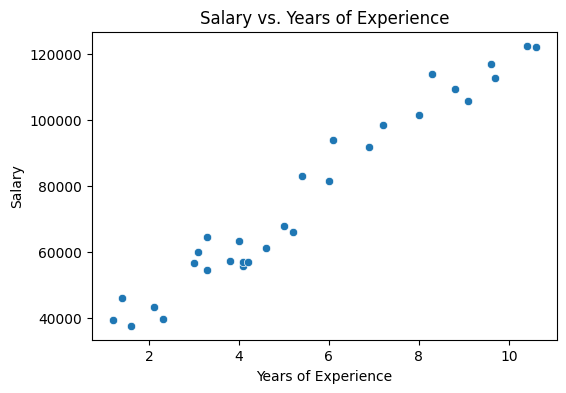

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='YearsExperience', y='Salary', data=salary)
plt.title('Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
salary = (salary - salary.min()) / (salary.max() - salary.min())
salary.head()

,YearsExperience,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514


In [ ]:
X = salary[['YearsExperience']]
y = salary['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

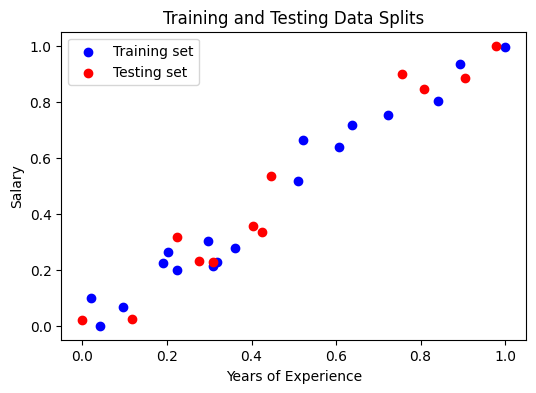

In [ ]:
plt.figure(figsize=(6, 4))

# Plot training set
plt.scatter(X_train, y_train, color='blue', label='Training set')

# Plot testing set
plt.scatter(X_test, y_test, color='red', label='Testing set')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Training and Testing Data Splits')
plt.legend()
plt.show()

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

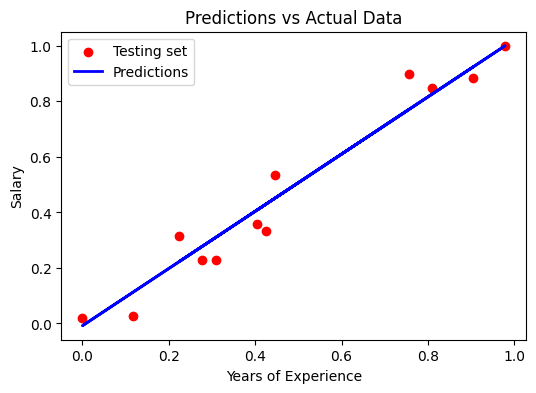

In [ ]:
y_pred = model.predict(X_test)

plt.figure(figsize=(6, 4))

# Plot testing set
plt.scatter(X_test, y_test, color='red', label='Testing set')

# Plot predictions
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Predictions')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Predictions vs Actual Data')
plt.legend()
plt.show()

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.9532338376280693

In [ ]:
new_data = pd.DataFrame({'YearsExperience': [11, 12]})
predicted_salaries = model.predict(new_data)
print(f'Predicted salaries for new data: {predicted_salaries}')

Predicted salaries for new data: [11.33174332 12.36266532]


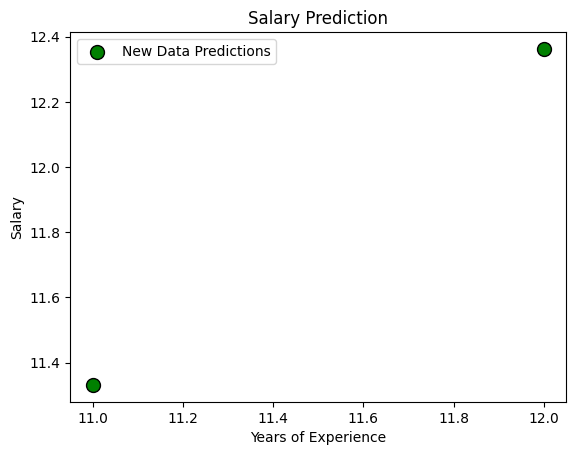

In [ ]:
plt.scatter(new_data, predicted_salaries, color='green', s=100, edgecolor='black', label='New Data Predictions')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.legend()
plt.show()